<a href="https://colab.research.google.com/github/srz11d/srz11d/blob/main/Take_HomeTask_SRL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Take home task


Welcome to your take home task. Congrats on making it to the next stage. This task should take around 20 minutes. There are four stages:
* Stage 1: Data Cleaning
* Stage 2: Model Buliding
* Stage 3: Model Evaluation
* Stage 4: Data Visualisation

You will be using the titanic dataset to build a simple Logistic Regression Model and then evaluating the performance of your mode. Please make a copy of this notebook. Once you have completed the task submit your Notebook file via the Ashby submission link in the original email. If you incur any issues please contact your talent partner.
Good luck and have fun

# Stage 1: Data Cleaning

* Load the attatched dataset and clean the data
* You should drop any duplicates values
* You should drop any null values
* You should drop PassengerId, Name, SibSp, Ticket, Cabin, Embarked, Sex columns
* Below is an example of what your data should look like


All relevant libraries have been allready imported for you (please ensure that you have them installed)

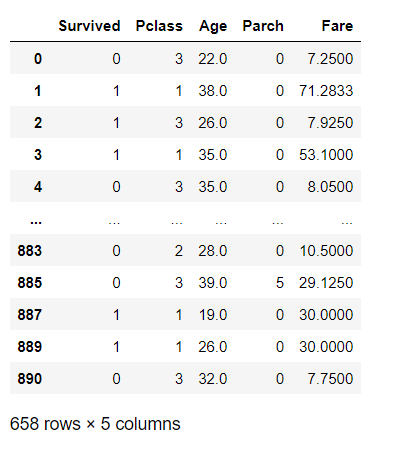

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [2]:
# downloading the dataset into /contents/ so it can be used for the exercise
# the filepath you can use is /content/titanic.csv to load your dataset
!gdown --id "1ZdhoVnOZIUs1X5qAja7hKQH-5QwYMmLE"

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ZdhoVnOZIUs1X5qAja7hKQH-5QwYMmLE
To: /content/titanic.csv
100% 60.3k/60.3k [00:00<00:00, 105MB/s]


In [3]:
#Load file
df = pd.read_csv('titanic.csv')

In [4]:
#See the head of the file
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#Let's drop duplicates
df = df.drop_duplicates()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [11]:
#Let's check for null values
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [12]:
#Let's drop null values
df = df.dropna()

In [13]:
#Let's check again for null values
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [14]:
#Drop columns
columns_to_drop = ['PassengerId', 'Name', 'SibSp', 'Ticket', 'Cabin', 'Embarked', 'Sex']
df = df.drop(columns=columns_to_drop)

In [15]:
#See how the new df looks like
df.head()

,Survived,Pclass,Age,Parch,Fare
1,1,1,38.0,0,71.2833
3,1,1,35.0,0,53.1000
6,0,1,54.0,0,51.8625
10,1,3,4.0,1,16.7000
11,1,1,58.0,0,26.5500


# Stage 2: Model Building

* You will now build a simple Logistic Regression model using the sklearn library
* You should use the following columns as your features Pclass, Age, Parch, Fare for your X values
* The Y value should be the survived column


In [ ]:
#Create the model with the assigned values
X = df[['Pclass', 'Age', 'Parch', 'Fare']]
y = df['Survived']

In [18]:
#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
#Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Stage 3: Model Evaluation

* Check the score of your model for the train values
* Check the score of your model for the test values
* Produce a classification report for your y values



In [20]:
#Check the score of the model for the train values
train_score = model.score(X_train, y_train)
print("Training Accuracy:", train_score)

Training Accuracy: 0.7328767123287672


In [21]:
#Check the score for the test values
test_score = model.score(X_test, y_test)
print("Testing Accuracy:", test_score)

Testing Accuracy: 0.6756756756756757


In [22]:
#Produce a classification report
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.14      0.25        14
           1       0.66      1.00      0.79        23

    accuracy                           0.68        37
   macro avg       0.83      0.57      0.52        37
weighted avg       0.79      0.68      0.59        37



# Stage 4: Data Visualisation

* Produce a confusion matrix for your model
* Plot a ROC curve for your model


In [23]:
#Confusion matrix for the model
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 2 12]
 [ 0 23]]


In [32]:
#Import AUC score
from sklearn.metrics import roc_auc_score

In [33]:
##ROC curve
#Get predicted probabilities for the positive class (class 1)
y_prob = model.predict_proba(X_test)[:, 1]

In [34]:
##ROC curve
#Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [35]:
##ROC curve
#Calculate the AUC (Area Under the Curve) score
roc_auc = roc_auc_score(y_test, y_prob)

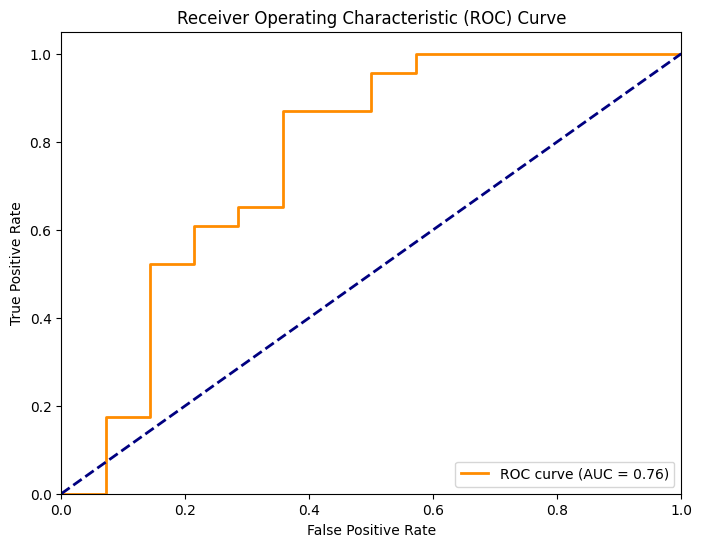

In [36]:
##ROC curve
#Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()